# Intro and dependencies

In [1]:
import PyPDF2
import os
import re
import requests
import pandas as pd
import numpy as np
from itertools import combinations 
from itertools import permutations
from itertools import chain
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
ps = PorterStemmer()

In [2]:
courseletlist = (
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F175%2F163757167020201210_Liu_crypto_p2p_lending.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F272%2F1654160257Lesson1-1.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F273%2F1654160288Lesson1-2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F274%2F1654160327Lesson1-3.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F275%2F1654160374Lesson1-4.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F276%2F1654160475Lesson1-5.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F277%2F1654160518Lesson1-6.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F279%2F1654251498Lesson2-1.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F278%2F1654160549Lesson1-7.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F280%2F1654251511Lesson2-2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F281%2F1654251525Lesson2-3.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F103%2F20210303+IA+METIS+Reinforcement+Learning.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F107%2F1636712642CATE_meets_ML_Presentation.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F120%2F163458263420190429+Hae+Ni+LDA+DTM.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F120%2F163646337920210921+Hae+Ni+LDA.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F121%2F163646358220210708+Hae+Ni+LDA+extensions.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F108%2F163595835420210530+METIS+WANG+Kalman+Filter.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F110%2F1632126441nodalida2021_summaryQuality_slides.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F112%2F163664661320211013+Ren+LI+Hae+Expectile+FRM.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F114%2F1635233254Shapley.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F118%2F1636625638FRM%40EM.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F119%2F163231165920210324+Wan+Hae+Li+k-expectile+clustering.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F130%2F1633104997PAC.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F134%2F163368764620210923+Mer+Hae+GAN+Generative+Adversarial+Networks.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F139%2F163402565120211012+Kho+Hae+Trespassing+random+forests+with+a+pointed+stick+for+self+defence.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F217%2F1644582711Berlin_short_course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F235%2F1649426301Variable+importance+measures+for+RF+.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F179%2F16376558632021122+SBA+JW+Hae+EPF++Quantinar.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F186%2F1645194357Presentation_Quantinar_with_videos.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F306%2FBarHan2021_talk.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F181%2F163826827620211130+LI+Hae+Case+based+Bancruptcy+prediction.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F224%2F164728525020220305+LI+Electricity+Market+Coupling.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F196%2F1642599075163458186420200403+METIS+Kho+Hae+Spectral+Clustering+course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F198%2F1642599289163231165920210324+Wan+Hae+Li+k-expectile+clustering+course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F141%2F163527012720210526+SAE+NAG+HAE+SIZ+Understanding+jumps+in+high+frequency+digital+asset+markets.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F201%2F16426862241636625638FRM%40EM_course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F202%2F1642686343163774999520210912+Hae+Li+Tao+Dynamic+Crypto+Networks_course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F189%2F163958119120211130+Hae+Wan+Kot+ComputerMuseum.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F183%2F1643806658KDE+ill-posed+problems.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F167%2F163699399420211115+Liu+Word+Embeddings+2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F157%2F1642778303introduction_data_science.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F180%2F16377653596.+model+assessment+-+part+4+-+appendix.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F128%2F163707553520210331_METIS_Hel_GANs_for_Time_Series.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F127%2F163458156320190528+Cea+Hae+Scagnostics.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F117%2F163458186420200403+METIS+Kho+Hae+Spectral+Clustering.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F106%2F163458175020200914+Hae+DS2+Data+Science+%26+Digital+Society.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F190%2F1640038524Instruction+for+Creating+Quantlets.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F144%2F1636624210NNCSR_Slides.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F184%2F163888970320211207+Zin+Reu+Hae+USC+Quantinar+40+min+PDF.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F133%2F163707963820210525_Hae_Xia_Crypto_Indices-2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F129%2F163458163120200915+Kim+Hae+Tri+VCRIX.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F123%2F163664570620210922+Mat+Pac+Hae+guide+hedging+CC.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F122%2F163283000220210923+Cul+Hae+Pet+Xia+Cryptocurrency+as+an+asset+class.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F116%2F163774999520210912+Hae+Li+Tao+Dynamic+Crypto+Networks.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F113%2F1632580703FRM+for+Cryptos.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F101%2F163170747120210914+Reu+DSF+Digital+Surrogate+Finance+Doc.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F97%2F163458105020210808+METIS+Win+Pricing+Kernel+Risk+Premium.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F96%2F163299370720210908_CRC21_Hae_Rodeo_or_Ascot.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F96%2F1635155323202109_RoA.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F79%2F164604019720210502+Hae+Har+Reu+Understanding+CCs.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F142%2F163627928020211107+Hae+Iva+Mat+Delaunay+Triangulation_A_Shape.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F135%2F1649084960Chapter+1.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F138%2F1649094430Chapter+4.pdf',
# problematic:
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F197%2F1642599236164171878820211207+Hae+Zin+Hierarchical+Clustering+course.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F241%2F1650632942Biographical+Background+Information.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F210%2F164390414020220130+METIS+Gua+Hae+Model+Selection+Criteria.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F194%2F164171878820211207+Hae+Zin+Hierarchical+Clustering.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F170%2F163709451820211117+Hae+Qia+Network+Centrality.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F136%2F1649094328Chapter+2.pdf',
'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F137%2F1633950248Chapter+3.pdf'
)

ids = (["id-{}".format(i+1) for i in range(len(courseletlist))])


stopwords_list = {"i","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your","yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it","it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this",'that',"that'll","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain","aren","aren't","couldn","couldn't","didn","didn't","doesn","doesn't","hadn","hadn't","hasn","hasn't","haven","haven't","isn","isn't","ma","mightn","mightn't","mustn","mustn't","needn","needn't","shan","shan't","shouldn","shouldn't","wasn","wasn't","weren","weren't","won","won't","wouldn","wouldn't"}

id_matrix = pd.DataFrame({'id': ids, 'url': courseletlist})

# Function initiations

In [3]:
def download_pdf(file_name, url):
    '''Download a PDF file with an URL (Step 1)'''

    # Define HTTP Headers
    headers = {"User-Agent": "Chrome/51.0.2704.103"}
    
    # Download image
    response = requests.get(url, headers=headers)
    
    # if response is OK download the PDF and store it, else write the status
    if response.status_code == 200:
        with open(file_name, "wb") as f:
            f.write(response.content)
    else:
        print(response.status_code)
    
    return

In [5]:
def create_string(file_name):
    '''Transform a PDF file to a list of string pages (Step 2)'''
    
    # opening the file
    imported_pdf = open(file_name, 'rb')
    
    # convert PDF to readable file
    transformed_pdf = PyPDF2.PdfFileReader(imported_pdf)
    
    # get number of pages
    totalpages = transformed_pdf.numPages
    
    # read the data and store in a list
    pdf_output = [transformed_pdf.getPage(i) for i in range(totalpages)]
    
    # extract result
    pdf_output = [pdf_output[i].extractText() for i in range(totalpages)]
    
    return pdf_output, totalpages 

In [6]:
def cleaning(file_name):
    '''Initial PDF cleaning procedure (Step 3)'''
    pdf_output, totalpages = create_string(file_name)
    
    # # cleaning URLs
    pdf_output = [re.sub(pattern = "http[^ ]*", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    
    # # cleaning symbols
    pdf_output = [re.sub(pattern = "\\n", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    pdf_output = [re.sub(pattern = "\W|\d", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    pdf_output = [re.sub(pattern = "[^a-zA-Z]", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    
    # # cleaning multispaces
    pdf_output = [re.sub(pattern = "\s{2,}", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    
    # # cleaning out 1-2-worders
    pdf_output = [re.sub(pattern = " .{1,2} ", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    pdf_output = [re.sub(pattern = " .{1,2} ", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    pdf_output = [re.sub(pattern = " .{1,2} ", repl = " ", string = pdf_output[i]) for i in range(totalpages)]
    
    # # lower-casing
    pdf_output = [pdf_output[i].lower() for i in range(totalpages)]
    pdf_output = [[ps.stem(word) for word in sentence.split(" ")] for sentence in pdf_output]
    pdf_output = [' '.join(pdf_output[i]) for i in range(len(pdf_output))]
    
    return pdf_output, totalpages

In [7]:
def word_lists(file_name):
    '''Creating the base one-word, two-word and three-word lists, the permutation lists for two- and three-word lists (Step 4)'''
    
    pdf_output, totalpages = cleaning(file_name)

    # split to a list
    word_list = [pdf_output[i].split(" ") for i in range(totalpages)]
    
    # stemming
    word_list_stemmed = [[ps.stem(word_list[i][j]) for j in range(len(word_list[i]))] for i in range(totalpages)]    
    word_list_stemmed = pd.DataFrame(word_list_stemmed)
    
    # one-word section
    one_word_list = [word_list_stemmed.iloc[j, i] for j in range(totalpages) for i in range(word_list_stemmed.shape[1])]
    one_word_list = [x for x in one_word_list if x not in stopwords_list]

    # two-word section
    two_word_list = [[word_list_stemmed.iloc[j, i], word_list_stemmed.iloc[j, i+1]] for j in range(totalpages)  for i in range(word_list_stemmed.shape[1] - 1)]
    two_word_permutation_list = [[p for p in permutations(two_word_list[k])][1:] for k in range(len(two_word_list))]
    two_word_permutation_set = set(list(chain(*two_word_permutation_list)))
    two_word_permutation_set = pd.DataFrame(two_word_permutation_set)

    # three-word section
    three_word_list = [[word_list_stemmed.iloc[j, i], word_list_stemmed.iloc[j, i+1], word_list_stemmed.iloc[j, i+2]] for j in range(totalpages) for i in range(word_list_stemmed.shape[1] - 2)]
    three_word_permutation_list = [[p for p in permutations(three_word_list[k])][1:] for k in range(len(three_word_list))]
    three_word_permutation_set = set(list(chain(*three_word_permutation_list)))
    three_word_permutation_set = pd.DataFrame(three_word_permutation_set)

    return word_list_stemmed, one_word_list, two_word_list, two_word_permutation_list, two_word_permutation_set, three_word_list, three_word_permutation_list, three_word_permutation_set

In [8]:
def occurance_one_matrix_creator(file_name):
    '''Creating the occurrance matrix for one-word combinations (Step 7)'''
    
    word_list_stemmed, one_word_list, two_word_list, two_word_permutation_list, two_word_permutation_set, three_word_list, three_word_permutation_list, three_word_permutation_set = word_lists(file_name)
    
    # copying the data
    words = one_word_list.copy()
    
    # creating the three-word combinations as one string
    words = [x for x in words if x != ""]
    words = [x for x in words if x != " "]    
    
    # crating the dictionary
    dictionary_one_word = {}
    
    # counting word occurances
    for word in words:
        if word in dictionary_one_word:
            dictionary_one_word[word] = dictionary_one_word[word] + 1
        else:
            dictionary_one_word[word] = 1
    dictionary_one_word = list(dictionary_one_word)
    dictionary_one_word = list(filter(None, dictionary_one_word))
    
    return dictionary_one_word

In [ ]:
# def combined_pdf_creator():
#     '''Creating the final master-pdf dataframe'''

# download the first pdf
download_pdf(ids[0], courseletlist[0])

# clean the first pdf
pdf_output, totalpages = cleaning(ids[0])

# create a word list of the first pdf
word_list_stemmed, one_word_list, two_word_list, two_word_permutation_list, two_word_permutation_set, three_word_list, three_word_permutation_list, three_word_permutation_set = word_lists(ids[0])

# create a one-word dictionary
dictionary_one_word = occurance_one_matrix_creator(ids[0])

# combine the pdf
combined_pdf = [' '.join(pdf_output)]

# iterate on above
for i in range(1, 70):
    print(i)
    download_pdf(ids[i], courseletlist[i])
    pdf_output, totalpages = cleaning(ids[i])
    word_list_stemmed, one_word_list, two_word_list, two_word_permutation_list, two_word_permutation_set, three_word_list, three_word_permutation_list, three_word_permutation_set = word_lists(ids[i])
    dictionary_one_word_0 = occurance_one_matrix_creator(ids[i])
    [dictionary_one_word.append(j) for j in dictionary_one_word_0]
    combined_pdf.append(' '.join(pdf_output))
    
    # return combined_pdf, dictionary_one_word

# TFIDF Section

In [244]:
# tfidf-ing the 1-word list
vectorizer_one = TfidfVectorizer(smooth_idf=True, sublinear_tf=True, use_idf=True, lowercase = False, stop_words = stopwords_list, ngram_range=(1,1))
X_one = vectorizer_one.fit_transform(combined_pdf)

# tfidf-ing the 2-word list
vectorizer_two = TfidfVectorizer(smooth_idf=True, sublinear_tf=True, use_idf=True, lowercase = False, stop_words = stopwords_list, ngram_range=(2,2))
X_two = vectorizer_two.fit_transform(combined_pdf)

# tfidf-ing the 3-word list
vectorizer_three = TfidfVectorizer(smooth_idf=True, sublinear_tf=True, use_idf=True, lowercase = False, stop_words = stopwords_list, ngram_range=(3,3))
X_three = vectorizer_three.fit_transform(combined_pdf)

In [245]:
# dataframe for tfidf 1-word list
xx_one = pd.DataFrame(X_one.toarray(), columns = 
vectorizer_one.get_feature_names_out())

# dataframe for tfidf 2-word list
xx_two = pd.DataFrame(X_two.toarray(), columns = 
vectorizer_two.get_feature_names_out())

# dataframe for tfidf 3-word list
xx_three = pd.DataFrame(X_three.toarray(), columns = 
vectorizer_three.get_feature_names_out())

# SVD Section

In [107]:
component_one_test = []
for i in range(1,70):
    lsa_obj = TruncatedSVD(n_components=i)
    tfidf_lsa_data_one = lsa_obj.fit_transform(X_one)
    component_one_test.append(lsa_obj.explained_variance_ratio_.sum())
component_one_test_plot = pd.DataFrame({'components': range(1,70), 'explained_var' : component_one_test})

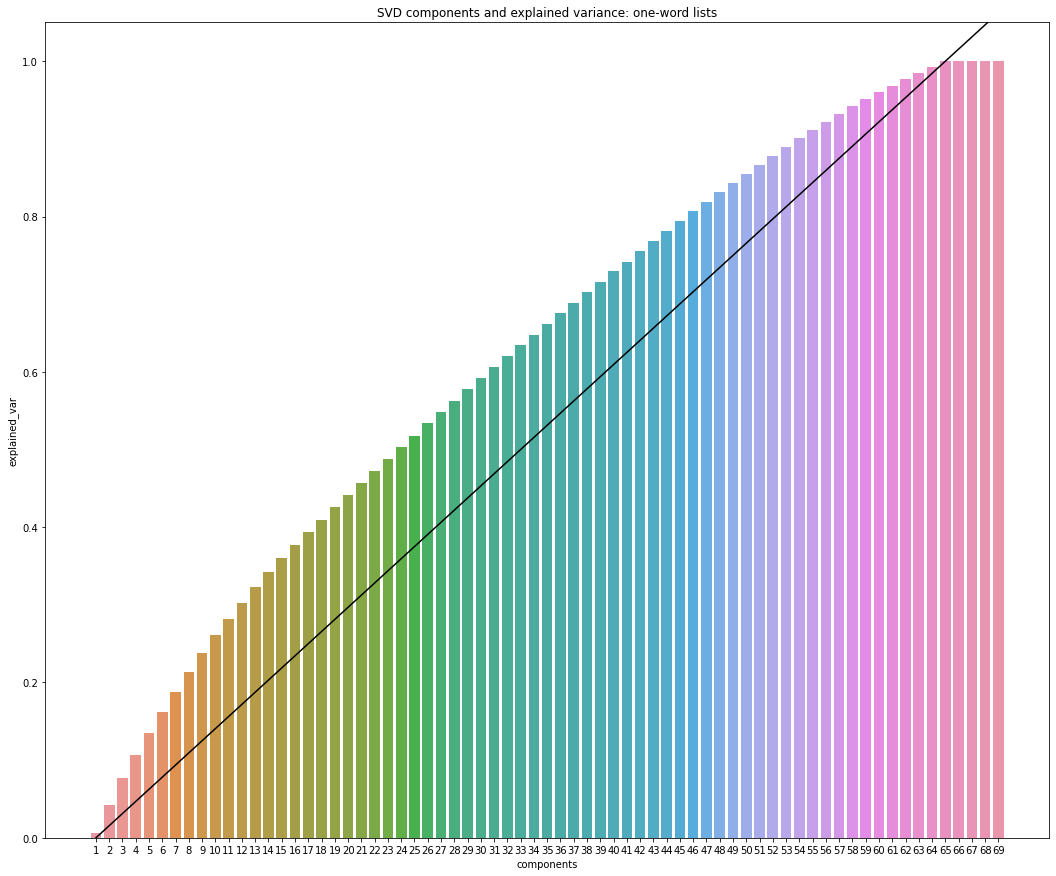

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18, 15)
sns.barplot(x = component_one_test_plot.components, y = component_one_test_plot.explained_var).set(title='SVD components and explained variance: one-word lists')
ax.axline((0,0), (64,1), color = 'k')

In [109]:
component_two_test = []
for i in range(1,70):
    lsa_obj = TruncatedSVD(n_components=i)
    tfidf_lsa_data_two = lsa_obj.fit_transform(X_two)
    component_two_test.append(lsa_obj.explained_variance_ratio_.sum())
component_two_test_plot = pd.DataFrame({'components': range(1,70), 'explained_var' : component_two_test})

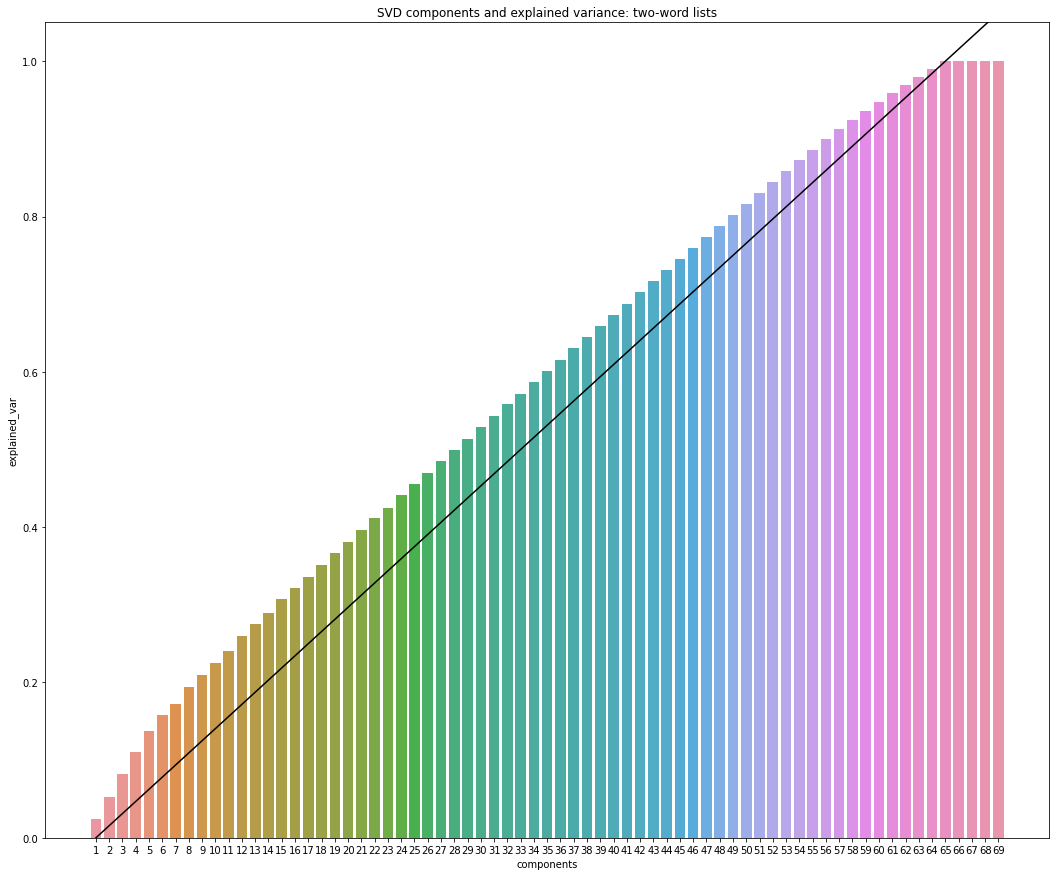

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18, 15)
sns.barplot(x = component_two_test_plot.components, y = component_two_test_plot.explained_var).set(title='SVD components and explained variance: two-word lists')
ax.axline((0,0), (64,1), color = 'k')

In [111]:
component_three_test = []
for i in range(1,70):
    lsa_obj = TruncatedSVD(n_components=i)
    tfidf_lsa_data_three = lsa_obj.fit_transform(X_three)
    component_three_test.append(lsa_obj.explained_variance_ratio_.sum())
component_three_test_plot = pd.DataFrame({'components': range(1,70), 'explained_var' : component_three_test})

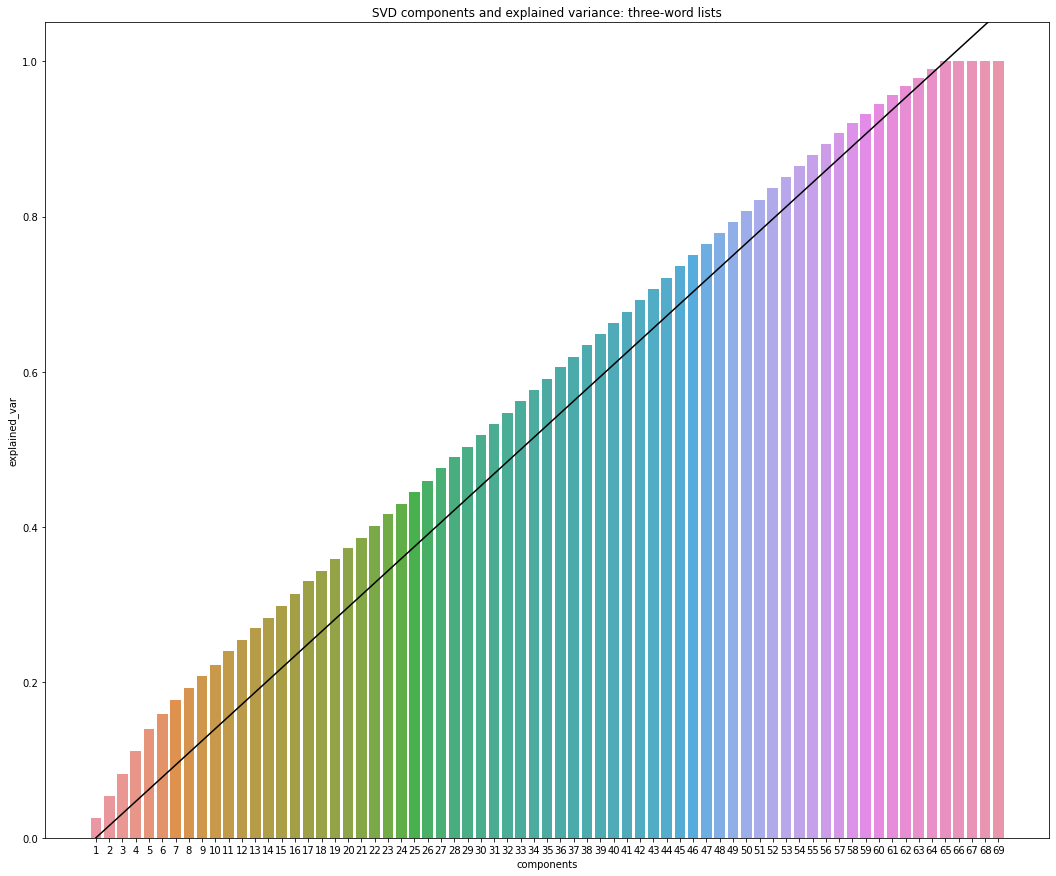

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18, 15)
sns.barplot(x = component_three_test_plot.components, y = component_three_test_plot.explained_var).set(title='SVD components and explained variance: three-word lists')
ax.axline((0,0), (64,1), color = 'k')

In [113]:
componenets_results = pd.DataFrame({'one': component_one_test, 'two': component_two_test, 'three': component_three_test})
componenets_results

,one,two,three
0,0.006780,0.024131,0.025205
1,0.042866,0.052996,0.054147
2,0.077057,0.082337,0.082709
3,0.106705,0.111068,0.111773
4,0.134581,0.137777,0.139947
...,...,...,...
64,1.000000,1.000000,1.000000
65,1.000000,1.000000,1.000000
66,1.000000,1.000000,1.000000
67,1.000000,1.000000,1.000000


In [132]:
lsa_obj = TruncatedSVD(n_components=64)
tfidf_lsa_data_one = lsa_obj.fit_transform(X_one)
Sigma_one = lsa_obj.singular_values_
V_T_one = lsa_obj.components_.T

# lsa_obj = TruncatedSVD(n_components=64)
# tfidf_lsa_data_two = lsa_obj.fit_transform(X_two)
# Sigma_two = lsa_obj.singular_values_
# V_T_two = lsa_obj.components_.T

# lsa_obj = TruncatedSVD(n_components=64)
# tfidf_lsa_data_three = lsa_obj.fit_transform(X_three)
# Sigma_three = lsa_obj.singular_values_
# V_T_three = lsa_obj.components_.T

In [133]:
# generates U
tfidf_lsa_data_one

array([[ 0.33959524, -0.1334264 , -0.05757287, ...,  0.00960322,
         0.00320603, -0.02925027],
       [ 0.25663173, -0.24305892, -0.27314246, ...,  0.00911879,
        -0.01717998,  0.00960308],
       [ 0.29381254, -0.24361159, -0.28574507, ..., -0.00653022,
        -0.02086687, -0.01957068],
       ...,
       [ 0.33106747,  0.02279812,  0.07489801, ...,  0.00253424,
        -0.00940009,  0.00649531],
       [ 0.21378673,  0.17855172, -0.1060185 , ...,  0.01323632,
        -0.00158011,  0.00307824],
       [ 0.24011843,  0.2187638 , -0.10311457, ..., -0.04465321,
         0.0152759 , -0.00392331]])

In [134]:
# generate Sigma.
# The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.
Sigma_one

array([2.68216527, 1.5105588 , 1.47513704, 1.37242492, 1.3259871 ,
       1.31456251, 1.29528215, 1.267049  , 1.24962665, 1.20977248,
       1.16369145, 1.14354295, 1.1314173 , 1.11514731, 1.05711844,
       1.05386862, 1.04924573, 1.01776279, 1.01210123, 1.00414197,
       0.99794674, 0.99346748, 0.98956785, 0.98506538, 0.98306292,
       0.97734644, 0.97083631, 0.96089497, 0.95982652, 0.95289366,
       0.94875495, 0.94640772, 0.94336823, 0.93811888, 0.93285972,
       0.92575518, 0.92147663, 0.91972258, 0.91020246, 0.9081872 ,
       0.90517979, 0.90356756, 0.89728644, 0.89045102, 0.88598098,
       0.88397123, 0.87473535, 0.87085789, 0.86840396, 0.85799197,
       0.84518536, 0.8432229 , 0.84087571, 0.82799252, 0.81874818,
       0.81449319, 0.79644961, 0.78529345, 0.76684894, 0.75108447,
       0.741904  , 0.72023113, 0.71286929, 0.69920417])

In [125]:
# The right singular vectors of the input data.
lsa_obj.components_

array([[ 1.03428944e-03,  2.63054966e-04,  2.63054966e-04, ...,
         3.99046446e-04,  2.63054965e-04,  8.72874474e-06],
       [ 6.69161574e-04,  1.82282059e-04,  1.82282059e-04, ...,
         3.01195826e-04,  1.82282059e-04,  6.98993767e-06],
       [ 5.12898505e-04,  4.36778594e-05,  4.36778596e-05, ...,
         5.22773277e-04,  4.36778596e-05,  3.62859393e-05],
       ...,
       [-3.61296499e-04,  2.91487444e-04,  2.91487444e-04, ...,
         3.76727290e-04,  2.91487444e-04, -9.67570026e-05],
       [ 1.53499024e-03,  9.12511862e-03,  9.12511862e-03, ...,
        -7.69892703e-05,  9.12511862e-03, -3.21697828e-05],
       [ 2.34154505e-03,  1.57996877e-02,  1.57996877e-02, ...,
        -6.15695768e-05,  1.57996877e-02,  5.53182804e-05]])

In [135]:
# generates Sgenerates V_T
V_T_one

array([[ 6.91589338e-03, -2.02154962e-03, -1.39453904e-02, ...,
         3.39062187e-03,  1.59971107e-02,  2.48770833e-03],
       [ 1.10662953e-03,  2.81192945e-04, -1.44490557e-03, ...,
        -1.33585586e-03, -4.70961458e-03, -8.57562541e-04],
       [ 8.56332105e-04,  2.12214064e-04, -1.11587925e-03, ...,
        -1.36235479e-03, -5.36469618e-03, -1.63232670e-03],
       ...,
       [ 2.74642692e-03, -4.16396337e-03,  7.41339349e-03, ...,
        -2.46209776e-02, -7.11223025e-03,  6.05940728e-02],
       [ 8.56332105e-04,  2.12214064e-04, -1.11587925e-03, ...,
        -1.36235479e-03, -5.36469618e-03, -1.63232670e-03],
       [ 1.56425699e-03, -2.31660728e-04, -9.03641714e-05, ...,
         1.97902975e-03, -4.68000476e-04,  8.20712631e-04]])

In [136]:
print('explained_variance_ratio_:\n', lsa_obj.explained_variance_ratio_, '\n')

print('explained_variance_ratio_:\n', lsa_obj.explained_variance_ratio_.sum(), '\n')

print('singular_values_:\n', lsa_obj.singular_values_, '\n')

print('get_feature_names_out:\n', lsa_obj.get_feature_names_out)

explained_variance_ratio_:
 [0.00678007 0.0361063  0.03421781 0.02974027 0.02781938 0.02730799
 0.02643953 0.02541417 0.02469629 0.02308225 0.02139957 0.02069885
 0.02026888 0.01961024 0.01769006 0.01758559 0.01740493 0.01634715
 0.01620681 0.01585216 0.01574531 0.01561994 0.01548155 0.01536022
 0.01529879 0.01511994 0.01491706 0.01461776 0.01458644 0.01437471
 0.01425196 0.01415305 0.01408835 0.0139142  0.01376431 0.01356989
 0.01344189 0.0133804  0.01311754 0.01305956 0.01296459 0.01292525
 0.01274579 0.01255385 0.0124288  0.01237056 0.01210726 0.01200231
 0.01194048 0.01165475 0.01131051 0.011253   0.01119334 0.01085131
 0.01061398 0.01050288 0.01004354 0.00976412 0.00930789 0.00892914
 0.00871127 0.00821345 0.00804117 0.00773784] 

explained_variance_ratio_:
 0.9926982481849876 

singular_values_:
 [2.68216527 1.5105588  1.47513704 1.37242492 1.3259871  1.31456251
 1.29528215 1.267049   1.24962665 1.20977248 1.16369145 1.14354295
 1.1314173  1.11514731 1.05711844 1.05386862 1.04924

# Word count visualisation section

In [188]:
# vectorizer_one = TfidfVectorizer(smooth_idf=True, sublinear_tf=True, use_idf=True, lowercase = False, stop_words = stopwords_list, ngram_range=(1,1))
# input_matrix = vectorizer_one.fit_transform(combined_pdf).todense()

In [ ]:
# svd_modelling = TruncatedSVD(n_components=64)
# svd_modelling.fit_transform(input_matrix)
# components = svd_modelling.components_
# vocab = vectorizer_one.get_feature_names_out()

In [196]:
# Getting the best words for each vector
test = [xx_one.columns[i] for i in lsa_obj.components_[1].argsort()[::-1]][:64]
test

['partit', 'spectral']

In [246]:
svd_modelling = TruncatedSVD(n_components=64)
svd_modelling.fit_transform(X_one)
components = svd_modelling.components_
vocab = vectorizer_one.get_feature_names()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['aaab', 'aaac', 'aaacchicbvfna', ..., 'zytjtvt', 'zzl', 'zzt'],
      dtype=object)

In [237]:
topic_word_list = []
for i, comp in enumerate(components):
    terms_comp = zip(vocab, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    topic=" "
    for t in sorted_terms:
        topic= topic + ' ' + t[0]
    topic_word_list.append(topic)
topic_word_list

['  model data time market cluster return network use berlin price',
 '  partit spectral cluster wij sat mat clusteringgraph eval evec cat',
 '  frm emerg uplift hrp risk index pariti portfolio equiti lasso',
 '  nvcpinkrddstratxbcbtsburstdgbdogeltcardrgntlskpascxrpbtcetcethomniscdashdcrfctgnonmrdynam spectral laplacian cluster edg btcomnigntclambbrdgbsclsknmrblitzltcethbtsfctdogestratsteembtcddmdbtmgroup crypto block groupg graph',
 '  hierarch proxim linkag nancial clusteringclust health clusteringr dendrogram frm hash',
 '  expectil kec crix vtau xij clusterclust convergenceno round clusteringk arg',
 '  latexit null lda dirichlet sha aaab doc king document death',
 '  jump linkag volatil proxim price health understand ascot rodeo clusteringr',
 '  clusteringgraph eval evec cut clusteringspectr laplacian relax gap slide wij',
 '  quiz advanc mathemat volatil lemma call ascot rodeo cryptocurr calculu',
 '  adversari gan recurr crix vanilla discrimin gogh rp stack cnn',
 '  forest sig

In [255]:
topic_word_list = []
vocab_cleaned = [i for i in vocab if len(i) < 14]
def get_topics(components): 
    for i, comp in enumerate(components):
        terms_comp = zip(vocab_cleaned,comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
        topic=" "
        for t in sorted_terms:
            topic= topic + ' ' + t[0]
        topic_word_list.append(topic)
    return topic_word_list
get_topics(components)

['  notsatisfi deton vyeypkodx murforblend companiesappl smapeyk paasch yi big richard',
 '  quadratisch train companiesappl straighten nakel complic flash flog chainblock jacob',
 '  gtofa explicit yaomiajmgbbb inonlinear sorensen jinp qpn repli fellow magnet',
 '  pogrom train mada companiesappl esma calm decim boulder hungari hous',
 '  impli roughli metr org competit iidenti con divid gtofa ifm',
 '  formula liber ddqn companiesmor ctional ssourc composit artilleri zeta onameopl',
 '  mainstream pngsetup manuel dxf taranto aaab either lipstick ejej digit',
 '  leibler metr roughli richard iidenti xna athen spl con scholarship',
 '  complic flash flog denc conceiv mada sill hassett tick train',
 '  scheffer advoc namecoin mathison caught athen spl declar categoris scholarship',
 '  aerodynam hart shap ddqn yule eafa hold stablecoin tsai conserv',
 '  gmm tetschen uber predictionw rein sun sdk newton bullish tree',
 '  boligomr kzi hafner aerodynam xjt napol telecom fish jpjxt iivx',

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(67):
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='white', relative_scaling=0).generate(topic_word_list[i])
    plt.figure(figsize=(20, 30))
    plt.imshow(wc)
    plt.title(f"Topic{i+1}")
    plt.axis("off")
    plt.show()

# Exploing the word lenghts

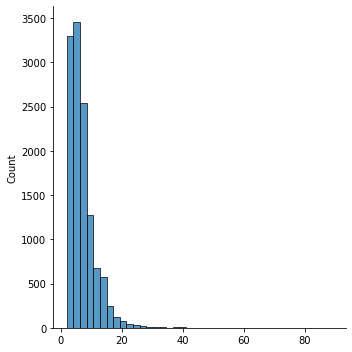

In [243]:
distribution_one_word = [len(i) for i in vocab if i is not None]
sns.displot(distribution_one_word, bins = 40)

In [252]:
distribution_one_word = pd.DataFrame({'word': vocab, 'len': [len(i) for i in vocab]})

# Input search

In [263]:
input_one = 'pricing'
input_one = input_one.split(' ')
input_one = [i for i in input_one if i not in stopwords_list]
input_one = [ps.stem(i) for i in input_one]

input_two = 'arbitrage rket'
input_two = input_two.split(' ')
input_two = [i for i in input_two if i not in stopwords_list]
input_two = [ps.stem(i) for i in input_two]
input_two = [' '.join(input_two)]

input_three = 'statistics of financial markets'
input_three = input_three.split(' ')
input_three = [i for i in input_three if i not in stopwords_list]
input_three = [ps.stem(i) for i in input_three]
input_three = [' '.join(input_three)]

In [265]:
def check_for_one(input_one):
    if input_one[0] in list(xx_one.columns):
        ranked_indexes_one = xx_one[input_one].sort_values(by = input_one, ascending=False).index
        ranked_indexes_one = list(ranked_indexes_one[0:5])
        output_one = [courseletlist[i] for i in ranked_indexes_one]
        print(output_one)
    else: 
        print('not present')
check_for_one(input_one)

['https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F224%2F164728525020220305+LI+Electricity+Market+Coupling.pdf', 'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F97%2F163458105020210808+METIS+Win+Pricing+Kernel+Risk+Premium.pdf', 'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F141%2F163527012720210526+SAE+NAG+HAE+SIZ+Understanding+jumps+in+high+frequency+digital+asset+markets.pdf', 'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F179%2F16376558632021122+SBA+JW+Hae+EPF++Quantinar.pdf', 'https://quantinar.s3.eu-west-3.amazonaws.com/courselet_components%2F129%2F163458163120200915+Kim+Hae+Tri+VCRIX.pdf']


In [266]:
def check_for_two(input_two):
    if input_two[0] in list(xx_two.columns):
        ranked_indexes_two = xx_two[input_two].sort_values(by = input_two, ascending=False).index
        ranked_indexes_two = list(ranked_indexes_two[0:5])
        output_two = [courseletlist[i] for i in ranked_indexes_two]
        print(output_two)
    else: 
        print('not present')
check_for_two(input_two)

not present


In [267]:
def check_for_three(input_three):
    if input_two[0] in list(xx_two.columns):
        ranked_indexes_two = xx_two[input_two].sort_values(by = input_two, ascending=False).index
        ranked_indexes_two = list(ranked_indexes_two[0:5])
        output_two = [courseletlist[i] for i in ranked_indexes_two]
        print(output_two)
    else: 
        print('not present')
check_for_three(input_three)

not present


In [261]:
if input_three[0] in list(xx_three.columns):
    ranked_indexes_three = xx_three[input_three].sort_values(by = input_three, ascending=False).index
    ranked_indexes_three = list(ranked_indexes_three[0:5])
    output_three = [courseletlist[i] for i in ranked_indexes_three]
    print(output_three)
else: 
    print('not present')

not present


In [292]:
# extended search:
input_initial = 'statistics of financial markets option pricing'
def input_sequence(input_initial): 

    '''Trimming input search terms to be used for the occurance matrix. The output is a generalized stemmed input form ready for checking and a count of terms for the ngram_range.'''

    input_general = input_initial.split(' ')
    input_general = [i for i in input_general if i not in stopwords_list]
    input_general_count = len(input_general)
    input_general = [ps.stem(i) for i in input_general]
    input_general = [' '.join(input_general)]
    return input_general, input_general_count

In [293]:
def general_occurance(input_initial): 

    '''Creation of the generalized tfidf occurance matrix based on dynamic parameters.'''

    input_general, input_general_count = input_sequence(input_initial)
    vectorizer_general = TfidfVectorizer(smooth_idf=True, sublinear_tf=True, use_idf=True, lowercase = False, stop_words = stopwords_list, ngram_range=(input_general_count, input_general_count))
    X_general = vectorizer_general.fit_transform(combined_pdf)
    xx_general = pd.DataFrame(X_general.toarray(), columns = vectorizer_general.get_feature_names_out())
    return xx_general

In [ ]:
# def check_for_general(input_one):
#     print('number of words: ', input_general_count, '\n search term: ', input_general)
    
#     if input_general[0] in list(xx_general.columns):
#         ranked_indexes_one = xx_general[input_one].sort_values(by = input_one, ascending=False).index
#         ranked_indexes_one = list(ranked_indexes_one[0:5])
#         output_one = [courseletlist[i] for i in ranked_indexes_one]
#         print(output_one)
#     else: 
#         print('not present')

# check_for_general(input_one)

In [303]:
input_initial = 'statistics of financial markets option pricing'
# input_general = input_initial.split(' ')
# input_general = [i for i in input_general if i not in stopwords_list]
# input_general_count = len(input_general)
# input_general = [ps.stem(i) for i in input_general]
input_initial

'statistics of financial markets option pricing'